Data Questions:

Steps:
1. Import data
2. Clean data
3. Output cleaned file
4. Import clean file
5. Import columns into new Panda dataframe
6. Analyse with the pd.describe() function
7. Plot some of the graphs 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

First, need to import the data into python

Data Dictionary

https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm#Mortality_Multiple

MannerOfDeath = 2:Suicide

DeathDow = 
1:Sunday
2:Monday
3:Tuesday
4:Wednesday
5:Thursday
6:Friday
7:Saturday

DeathMonth:
10:October
11:November
12:December
01:January
02:February
03:March
04:April
05:May
06:June
07:July
08:August
09:September

In [3]:
#print current directory
print(os.getcwd())

C:\Users\Maximilliano\Documents\IST 652 Scripting for Data Science\MiniProject1


In [5]:
#where is the file located
path = input("Enter the path to the file:")

#set the current working directory
os.chdir(path) 

Enter the path to the file:C:\Users\Maximilliano\Documents\IST 652 Scripting for Data Science\Test\


In [6]:
data = input("Enter the file name:")


#C:\Users\Maximilliano\Documents\IST 652 Scripting for Data Science\Test\Suicide.csv

Enter the file name:Suicide.csv


In [ ]:
#newData = pd.read_csv("..\MiniProject1\Suicide.csv")

In [7]:
#read in the new data set again.
newData = pd.read_csv(data)

In [8]:
#print summary statistics for the newData dataframe
print(newData.describe(),'\n','\n','\n', newData.head(),'\n','\n', 'The column names in the data are:{}'.format(list(newData)))

                Age  PlaceOfDeath  MannerOfDeath    DeathMonth      DeathDoW  \
count  31437.000000  31437.000000        31437.0  31437.000000  31437.000000   
mean      46.491141      4.423991            2.0      6.589592      3.909056   
std       24.188582      1.788236            0.0      3.265887      1.976457   
min        8.000000      1.000000            2.0      1.000000      1.000000   
25%       31.000000      4.000000            2.0      4.000000      2.000000   
50%       46.000000      4.000000            2.0      7.000000      4.000000   
75%       60.000000      7.000000            2.0      9.000000      6.000000   
max      999.000000      9.000000            2.0     12.000000      9.000000   

          Year  
count  31437.0  
mean    2017.0  
std        0.0  
min     2017.0  
25%     2017.0  
50%     2017.0  
75%     2017.0  
max     2017.0   
 
 
    Age Sex  PlaceOfDeath  MannerOfDeath  DeathMonth  DeathDoW  Year
0   58   F             4              2           1 

In [9]:
print("The new dataframe is:",newData.shape[0], 'x', newData.shape[1])

The new dataframe is: 31437 x 7


In [10]:
#want to perform the descriptive statistics on a single columns... lets create a function that pulls the column from a dataframe and calculates the mean, max, min)
#newData.isna().count()

#identified that the .csv has white spaces and needs to be removed
newData.columns = newData.columns.str.replace(' ', '') 

#view the head of the data to validate
newData.head()



,Age,Sex,PlaceOfDeath,MannerOfDeath,DeathMonth,DeathDoW,Year
0,58,F,4,2,1,5,2017
1,46,F,7,2,1,1,2017
2,37,M,7,2,1,2,2017
3,51,M,4,2,1,3,2017
4,27,M,4,2,1,3,2017


now need to use the new dataset and generate some descriptive statistics

In [11]:
gender = newData.groupby('Sex').Age.count()
print('The following are the count of suicides for 2017 by', gender)

The following are the count of suicides for 2017 by Sex
 F     6907
 M    24530
Name: Age, dtype: int64


In [ ]:
#female = gender[0]
#male = gender[1]


In [12]:
#(1) Create a new dataframe with just count of Age by Gender
analysis1 = newData.groupby(['Age','Sex'], sort=True).size().reset_index(name='Count')
#type(analysis1)
#analysis1_age = analysis1[['Age', 'Sex']]

#last two rows have values of 999, need them removed.
analysis1.drop(analysis1.tail(2).index,inplace=True)

#create a pivot table to plot against
analysis1 = pd.pivot_table(analysis1, index= 'Age', columns = 'Sex', aggfunc=sum)

#output dataframe to .csv file in local directory
analysis1.to_csv('analysis1.csv', sep=',', encoding='utf-8')
#analysis1

Plot the age differences to view the similarities between males and females

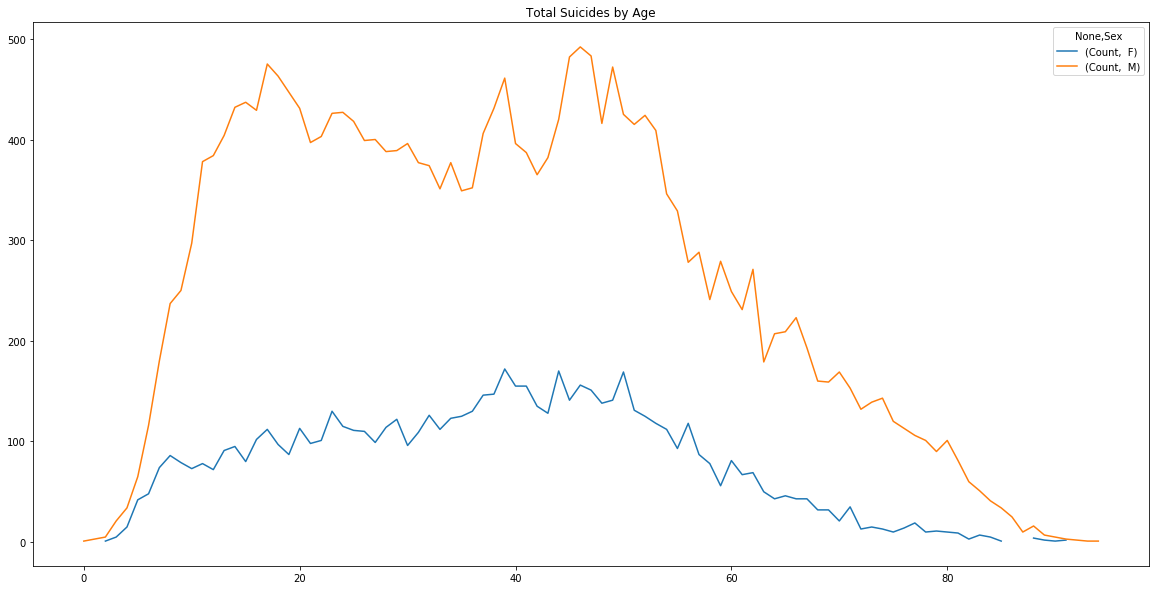

In [13]:
#analysis1.plot.bar(rot=0, subplots=True) <- plots both male and female in different graphs
analysis1_plot = analysis1.plot(title="Total Suicides by Age", use_index=False, figsize=(20,10))




In [14]:
#save the plot
fig = analysis1_plot.get_figure()
fig.savefig('analysis1_plot.png', transparent = False)

1B. What is the mean age for males and females suicide for 2017?

In [15]:
male = newData.loc[(newData['Sex'] == ' M')]
male = male.groupby(['Age', 'DeathDoW'], sort=True).size().reset_index(name='Count')

#last 3 rows have age = 999, need removed
male.drop(male.tail(3).index,inplace=True)
male_mean = male['Age'].mean()

male_max = male['Age'].max()

print('The average male suicide age for 2017 is {} and the max age is {}.'.format(int(male_mean), male_max))



The average male suicide age for 2017 is 54 and the max age is 103.


In [16]:
female = newData.loc[(newData['Sex'] == ' F')]
female = female.groupby(['Age', 'DeathDoW'], sort=True).size().reset_index(name='Count')

#last 2 rows have age = 999, need removed
female.drop(female.tail(2).index,inplace=True)

female_min = female['Age'].min()

female_mean = female['Age'].mean()

female_max = female['Age'].max()

print('The minimum female age is {}, the average for 2017 is {}, and the max age is {}.'.format(female_min, int(female_mean), female_max))


The minimum age is 10, the average for 2017 is 51, and the max age is 102.


#(2) How many suicides by day of the week?

AxesSubplot(0.125,0.125;0.775x0.755)            Age      
Sex          F     M
DeathDoW            
1         1003  3462
2         1091  3897
3         1005  3668
4          954  3582
5         1019  3381
6          951  3397
7          876  3126


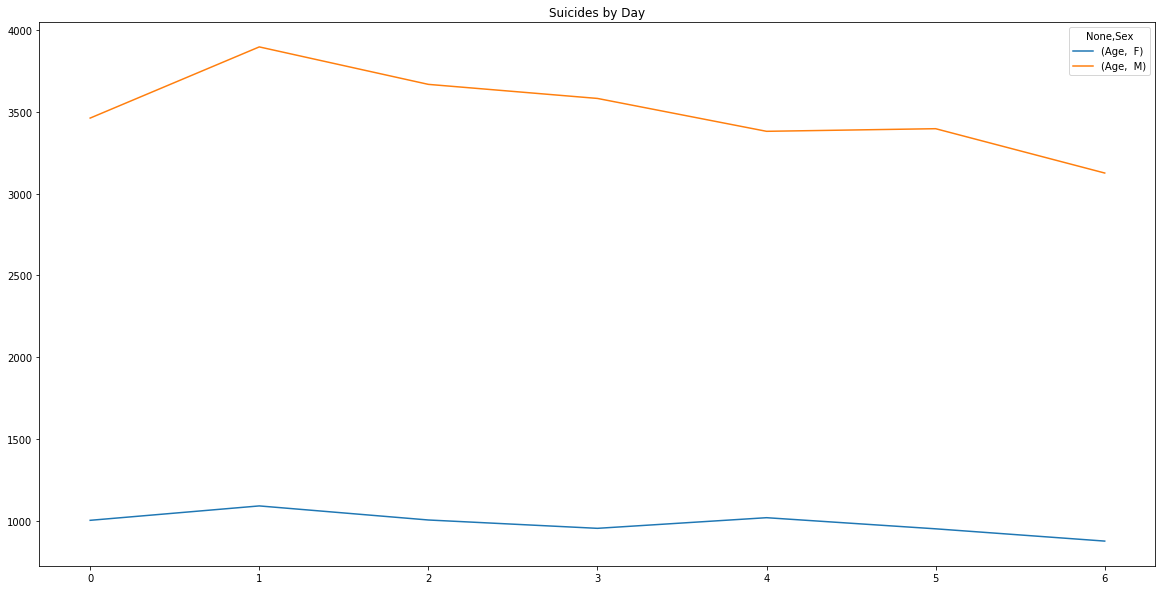

In [17]:
analysis2 = newData[['Age', 'Sex', 'DeathDoW']].sort_values('Age')


#analysis2 = newData.groupby(['Age','Sex', 'DeathDoW'], sort=True).size().reset_index(name='Count')


#need to remove the last 8 rows because age  = 999
analysis2.drop(analysis2.tail(8).index,inplace=True)

analysis2 = pd.pivot_table(analysis2, index= 'DeathDoW', columns = 'Sex', aggfunc='count')

#remove last row because there is no day 9, it is unknown
analysis2.drop(analysis2.tail(1).index,inplace=True)


analysis2_plot = analysis2.plot(title="Suicides by Day", use_index=False, figsize=(20,10))

analysis2.to_csv('analysis2.csv', sep=',', encoding='utf-8')

#save the plot
fig = analysis2_plot.get_figure()
fig.savefig('analysis2_plot.png', transparent = False)

print(analysis2_plot, analysis2)

In [18]:
female_monday = analysis2.iloc[1,0]
male_monday = analysis2.iloc[1,1]

print('The day in 2017 with the most Suicides is Monday with {} female and {} male deaths.'.format(female_monday, male_monday))


The day in 2017 with the most Suicides is Monday with 1091 female and 3897 male deaths.


(3) What is the suicides by month count? 

AxesSubplot(0.125,0.125;0.775x0.755)             Age      
Sex           F     M
DeathMonth           
1           485  1586
2           489  1744
3           534  1946
4           582  2095
5           621  2292
6           672  2233
7           660  2381
8           649  2327
9           622  2116
10          600  2172
11          551  1963
12          440  1669


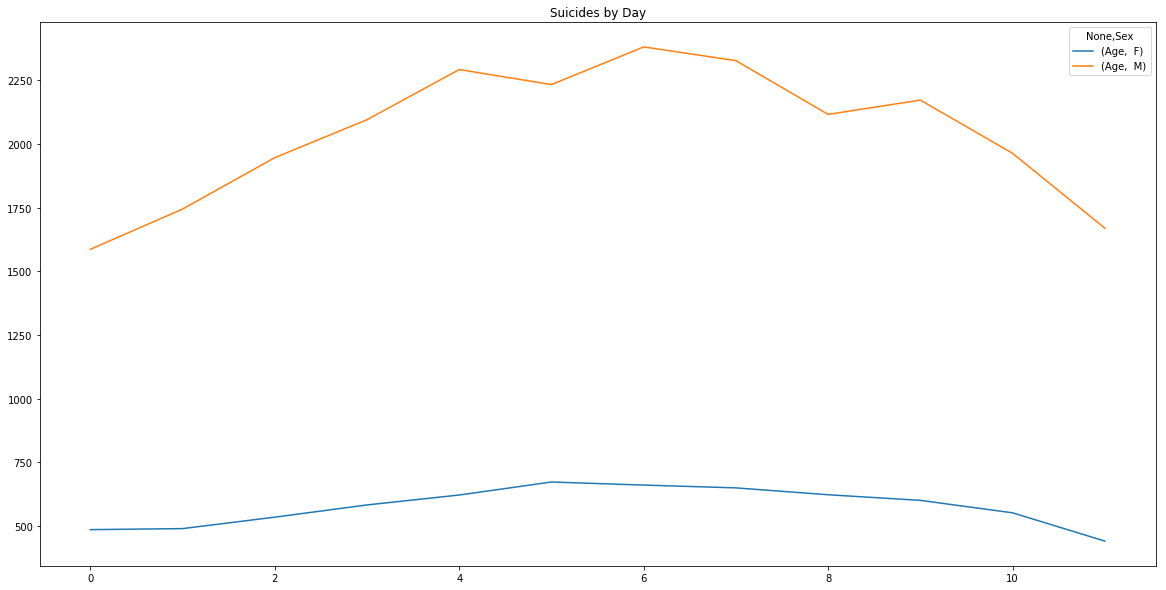

In [19]:
analysis3 = newData[['Age', 'Sex', 'DeathMonth']].sort_values('Age')

#analysis2 = newData.groupby(['Age','Sex', 'DeathDoW'], sort=True).size().reset_index(name='Count')


#need to remove the last 8 rows because age  = 999
analysis3.drop(analysis3.tail(8).index,inplace=True)

analysis3 = pd.pivot_table(analysis3, index= 'DeathMonth', columns = 'Sex', aggfunc='count')

analysis3_plot = analysis3.plot(title="Suicides by Day", use_index=False, figsize = (20,10))

analysis3.to_csv('analysis3.csv', sep=',', encoding='utf-8')

#save the plot
fig = analysis3_plot.get_figure()
fig.savefig('analysis3_plot.png', transparent = False)

print(analysis3_plot, analysis3)

In [63]:
female_months = analysis3.iloc[0:12,0]

Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
f_months = [i for i in female_months]
female_suicide_count = [(mon, val) for mon,val in zip(Months, f_months)]     

male_months = analysis3.iloc[0:12,1]
m_months = [i for i in male_months]
male_suicide_count = [(mon, val) for mon,val in zip(Months, m_months)]  

print('In 2017, The females suicides by month are:{} \n\n    and \n\n male suicides are: {}.'.format(pd.DataFrame(female_suicide_count), pd.DataFrame(male_suicide_count)))

In 2017, The females suicides by month are:      0    1
0   Jan  485
1   Feb  489
2   Mar  534
3   Apr  582
4   May  621
5   Jun  672
6   Jul  660
7   Aug  649
8   Sep  622
9   Oct  600
10  Nov  551
11  Dec  440 

    and 

 male suicides are:       0     1
0   Jan  1586
1   Feb  1744
2   Mar  1946
3   Apr  2095
4   May  2292
5   Jun  2233
6   Jul  2381
7   Aug  2327
8   Sep  2116
9   Oct  2172
10  Nov  1963
11  Dec  1669.


(4) What month to day combination resulsts in the highest suicides?

AxesSubplot(0.125,0.125;0.775x0.755)             Count                                                        \
Sex             F                                                     M   
DeathDoW        1      2      3      4      5      6      7    9      1   
DeathMonth                                                                
1            70.0   93.0   78.0   61.0   68.0   61.0   54.0  NaN  233.0   
2            66.0   75.0   74.0   73.0   82.0   60.0   58.0  1.0  252.0   
3            70.0   76.0   84.0   83.0   80.0   91.0   49.0  1.0  265.0   
4            86.0   88.0   78.0   76.0   82.0   87.0   85.0  NaN  336.0   
5            76.0  100.0  110.0  103.0   87.0   79.0   67.0  NaN  272.0   
6            88.0  100.0   74.0   78.0  128.0  104.0   99.0  1.0  297.0   
7           113.0  125.0   82.0   72.0   83.0   96.0   89.0  NaN  362.0   
8            97.0   92.0  118.0   96.0  103.0   74.0   69.0  NaN  293.0   
9            88.0   88.0   82.0   78.0   85.0   90.0  111.0  Na

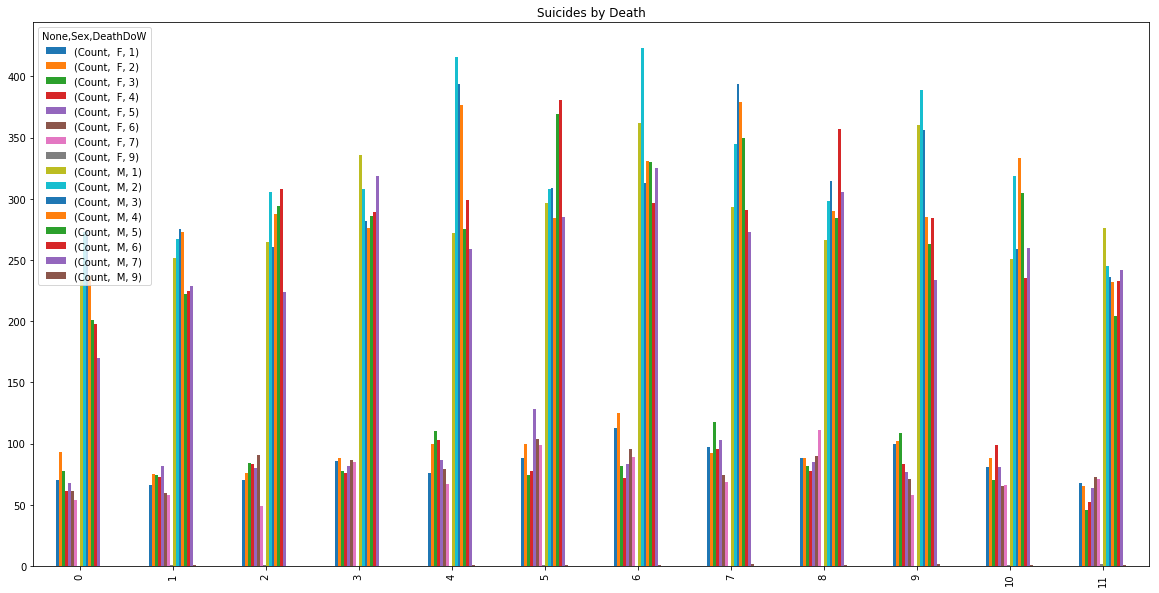

In [33]:
analysis4 = newData[['Sex', 'DeathMonth', 'DeathDoW']]


analysis4 = newData.groupby(['Sex', 'DeathMonth', 'DeathDoW'], sort=True).size().reset_index(name='Count')

#need to remove the last 8 rows because age  = 999
#analysis4.drop(analysis3.tail(8).index,inplace=True)

analysis4 = pd.pivot_table(analysis4, index= 'DeathMonth', columns = ['Sex', 'DeathDoW'])


#plot the dataframe to see where the most values occur
analysis4_plot = analysis4.plot(title="Suicides by Death", use_index=False, kind = 'bar', figsize=(20,10))

#save the plot
fig = analysis4_plot.get_figure()
fig.savefig('analysis4_plot.png', transparent = False)

print(analysis4_plot, analysis4)

In [64]:
# making boolean series for a team name 
#filter1 = analysis4.where["DeathMonth"]== 
analysis4.max()

analysis4['max_value'] = analysis4.max(axis=1)

analysis4.to_csv('analysis4.csv', sep=',', encoding='utf-8')

analysis4

Count                                                        \
Sex             F                                                     M   
DeathDoW        1      2      3      4      5      6      7    9      1   
DeathMonth                                                                
1            70.0   93.0   78.0   61.0   68.0   61.0   54.0  NaN  233.0   
2            66.0   75.0   74.0   73.0   82.0   60.0   58.0  1.0  252.0   
3            70.0   76.0   84.0   83.0   80.0   91.0   49.0  1.0  265.0   
4            86.0   88.0   78.0   76.0   82.0   87.0   85.0  NaN  336.0   
5            76.0  100.0  110.0  103.0   87.0   79.0   67.0  NaN  272.0   
6            88.0  100.0   74.0   78.0  128.0  104.0   99.0  1.0  297.0   
7           113.0  125.0   82.0   72.0   83.0   96.0   89.0  NaN  362.0   
8            97.0   92.0  118.0   96.0  103.0   74.0   69.0  NaN  293.0   
9            88.0   88.0   82.0   78.0   85.0   90.0  111.0  NaN  266.0   
10          100.0  102.0  109.0   83.0   77.0   71.0   58.0  NaN  360.0   
11           81.0   88.0   70.0   99.0   81.0   65.0   66.0  1.0  251.0   
12           68.0   65.0   46.0   52.0   64.0   73.0   71.0  2.0  276.0   

                                                          max_value  
Sex                                                                  
DeathDoW        2      3      4      5      6      7    9            
DeathMonth                                                           
1           273.0  274.0  237.0  201.0  198.0  170.0  NaN     274.0  
2           267.0  275.0  273.0  222.0  225.0  229.0  1.0     275.0  
3           306.0  261.0  288.0  294.0  308.0  224.0  NaN     308.0  
4           308.0  282.0  276.0  286.0  289.0  319.0  NaN     336.0  
5           416.0  394.0  377.0  275.0  299.0  259.0  1.0     416.0  
6           308.0  309.0  284.0  369.0  381.0  285.0  1.0     381.0  
7           423.0  313.0  331.0  330.0  297.0  325.0  1.0     423.0  
8           345.0  394.0  379.0  350.0  291.0  273.0  2.0     394.0  
9           298.0  315.0  290.0  284.0  357.0  306.0  1.0     357.0  
10          389.0  356.0  285.0  263.0  284.0  234.0  2.0     389.0  
11          319.0  259.0  333.0  305.0  235.0  260.0  1.0     333.0  
12          245.0  236.0  232.0  204.0  233.0  242.0  1.0     276.0